In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import pylab as plt
mpl.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

In [2]:
url = 'https://raw.githubusercontent.com/avinashsharma99/Python-for-Finance/master/tr_eikon_eod_data_new.csv'
data = pd.read_csv(url, index_col = 0, parse_dates=True)

# A Technical Analysis strategy  

The strategy is to go long on a stock when shorter-term SMA is above the longer-term SMA and should go short when the opposite holds true.

In [4]:
sym = 'AAPL.O'

data['SMA_short-term'] = data[sym].rolling(window=42).mean() # calculates short-terms SMA values

data['SMA_long-term'] = data[sym].rolling(window=252).mean() # calculates long-terms SMA values

data[[sym, 'SMA_short-term','SMA_long-term']].tail() 

,AAPL.O,SMA_short-term,SMA_long-term
Date,,,
2017-10-25,156.41,157.610952,139.862520
2017-10-26,157.41,157.514286,140.028472
2017-10-27,163.05,157.517619,140.221210
2017-10-30,166.72,157.597857,140.431528
2017-10-31,169.04,157.717857,140.651766


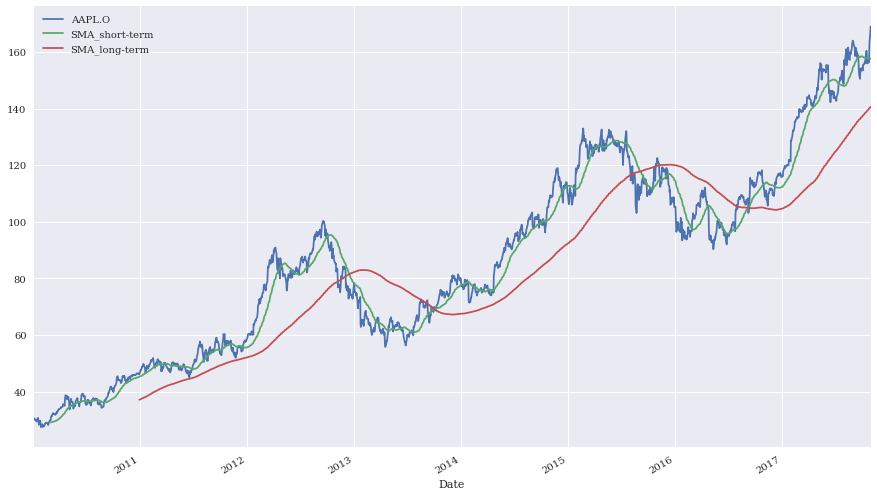

In [5]:
# display stock price data plus short and long term SMA time series
data[[sym, 'SMA_short-term','SMA_long-term']].plot(figsize=(15,9))

The following figure visualizes a long position by a value of 1 and short position by a value of -1. The change in the position is triggered (visuallly) by a crossover of the two lines representing the SMA time series.

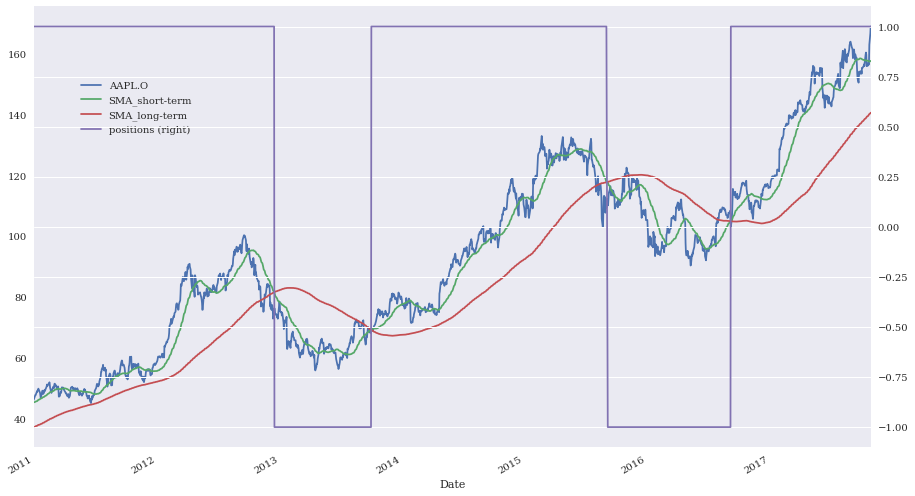

In [11]:
data.dropna(inplace=True)

# If shorter-term SMA value is greather than the longer-term one, go long on the stock (put a 1), 
# otherwise go short on stokc(put a -1)
data['positions'] = np.where(data['SMA_short-term'] > data['SMA_long-term'], 1, -1) 

ax = data[[sym, 'SMA_short-term','SMA_long-term', 'positions']].plot(figsize=(15,9), secondary_y='positions')

ax.get_legend().set_bbox_to_anchor((0.2, 0.85))